<a href="https://colab.research.google.com/github/Devashishadhi91/Level-5_AI/blob/main/Assignment_1_DevashishAdhikari_2358427.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Problem-1**


**Dataset Overview:**

In [61]:
import pandas as pd

# Load dataset
file_path = '/content/drive/My Drive/assignment/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

# Display first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Identify number of rows and columns
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# List all columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)


First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

**Basic Statistics:**

In [62]:
# Calculate mean, median, and standard deviation for the Score column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()

print(f"\nMean of Score: {mean_score}")
print(f"Median of Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")

# Identify country with highest and lowest happiness scores
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"\nCountry with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")



Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


**Missing Values:**

In [63]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filtering and Sorting:**

In [64]:
# Filter the dataset to show countries with Score greater than 7.5
filtered_df = df[df['score'] > 7.5]
print("\nCountries with Score greater than 7.5:")
print(filtered_df)

# Sort filtered dataset by GDP per Capita in descending order and display the top 10 rows
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries with Score > 7.5 sorted by Log GDP per capita:")
print(sorted_df.head(10))



Countries with Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  

Top 10 countries with Score > 7.5 sorted by Log GDP per capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525          

**Adding New Columns:**

In [65]:
# Create new column "Happiness Category"
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("\nDataset with the new 'Happiness Category' column:")
print(df[['Country name', 'score', 'Happiness Category']])



Dataset with the new 'Happiness Category' column:
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


**Data Visualizations:**

<ipython-input-66-ee6891b269d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


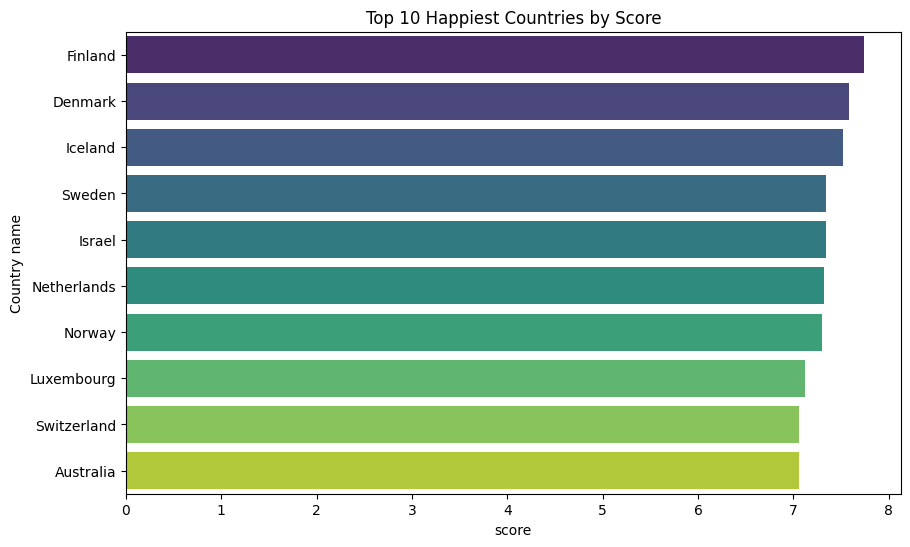

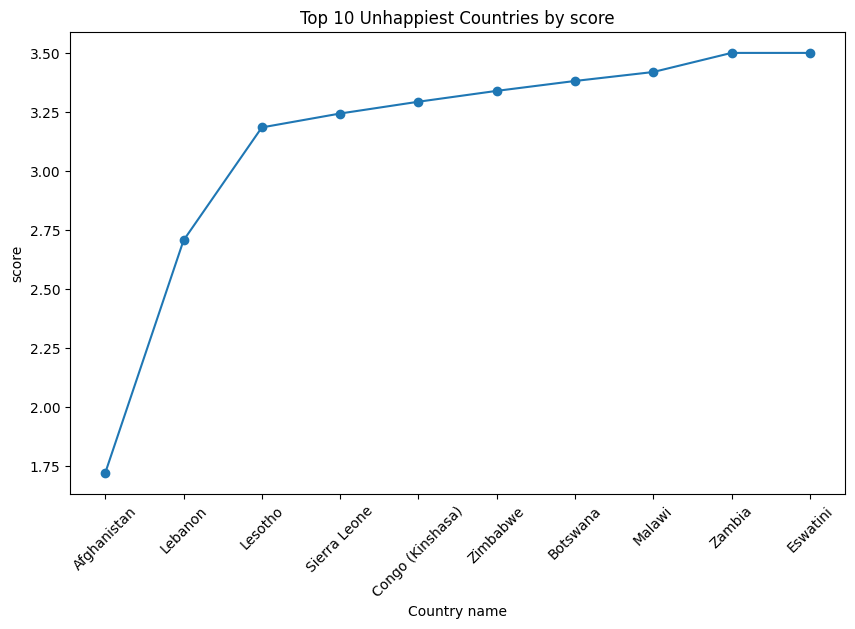

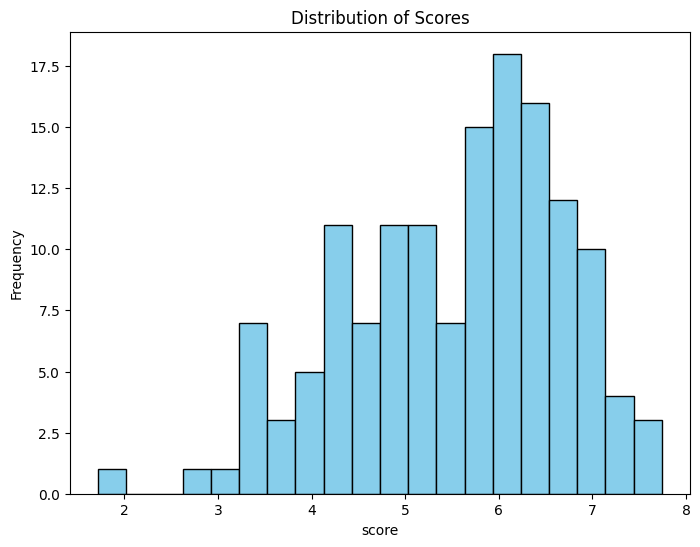

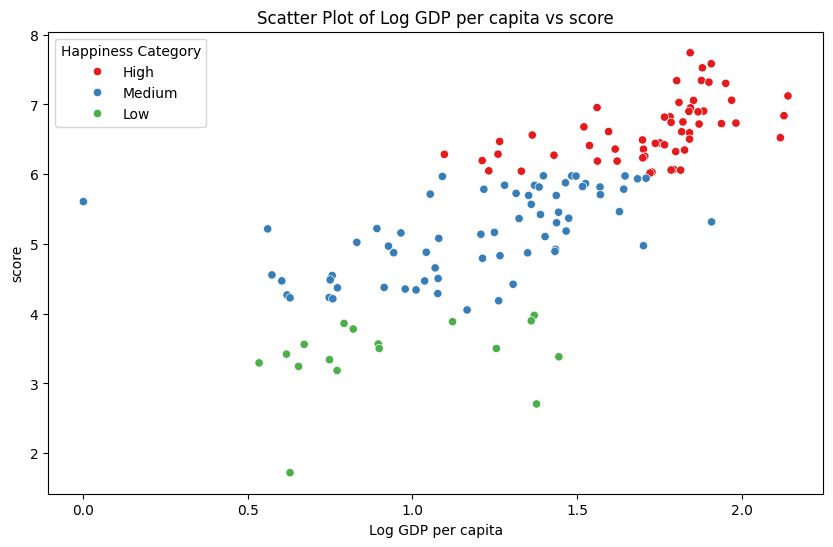

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot: top 10 happiest countries by Score
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('score')
plt.ylabel('Country name')
plt.show()

# Line Plot: top 10 unhappiest countries by Score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o')
plt.title('Top 10 Unhappiest Countries by score')
plt.xlabel('Country name')
plt.ylabel('score')
plt.xticks(rotation=45)
plt.show()

# Histogram for Score column
plt.figure(figsize=(8, 6))
plt.hist(df['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: GDP per Capita vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='Set1')
plt.title('Scatter Plot of Log GDP per capita vs score')
plt.xlabel('Log GDP per capita')
plt.ylabel('score')
plt.show()


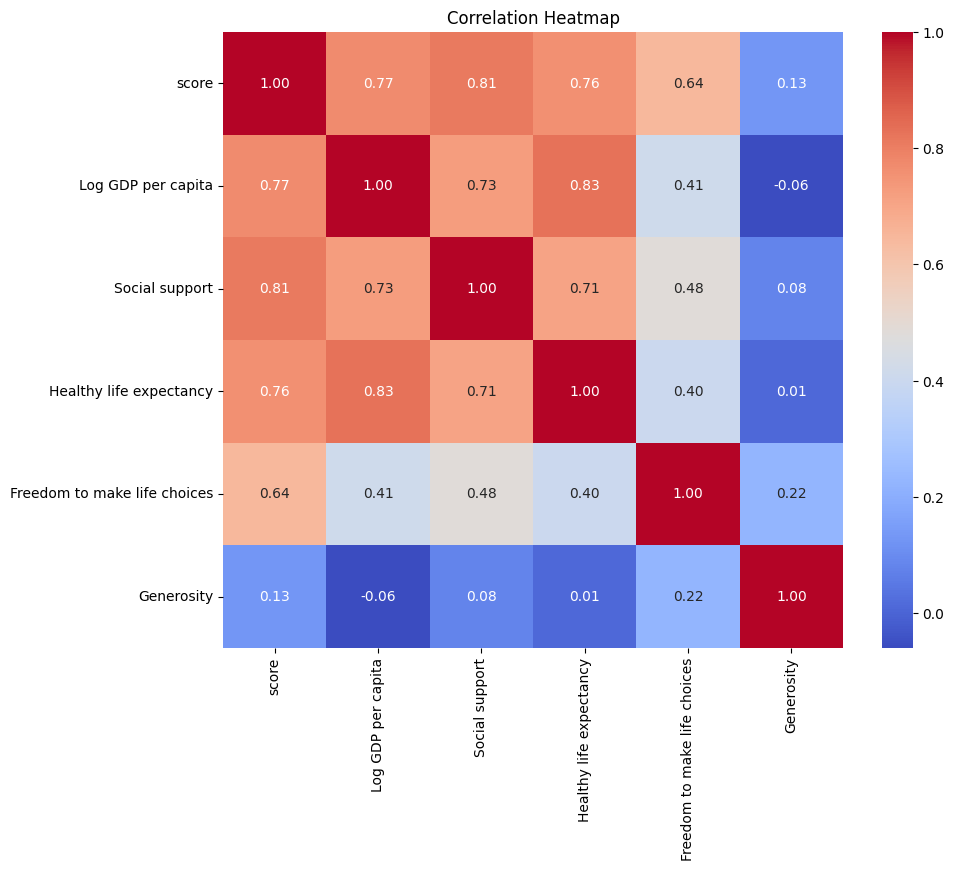

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Select the columns you want to include in the heatmap
columns_for_heatmap = ['score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']
heatmap_data = df[columns_for_heatmap]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Problem - 2 - Some Advance Data Exploration Task:**

**Task - 1 - Setup Task - Preparing the South-Asia Dataset:**

In [67]:
# Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Save filtered South Asia dataset to a new CSV file
south_asia_df.to_csv('SouthAsia.csv', index=False)
print("Filtered South Asia dataset saved as 'SouthAsia.csv'")


Filtered South Asia dataset saved as 'SouthAsia.csv'


**Task 2: Composite Score Ranking**

South Asian countries ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-68-27a034a4d7c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (
<ipython-input-68-27a034a4d7c6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='muted')


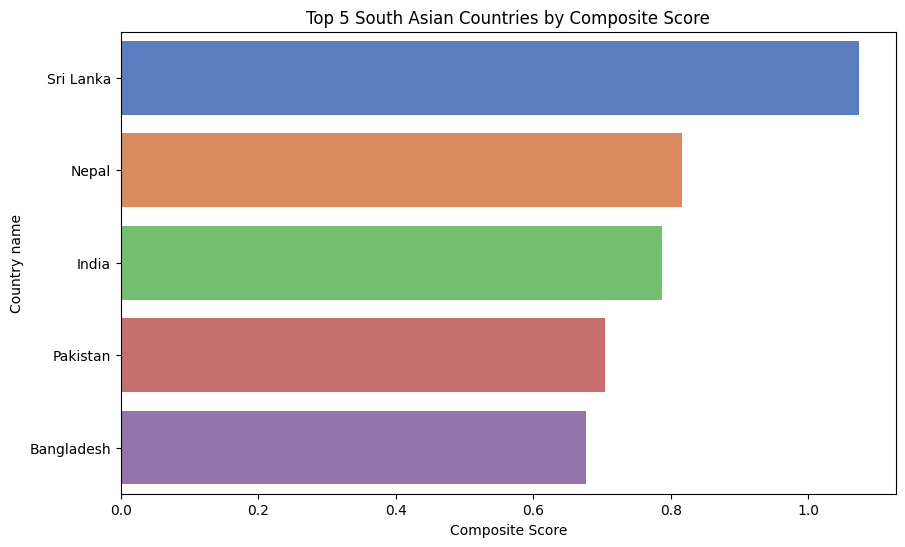

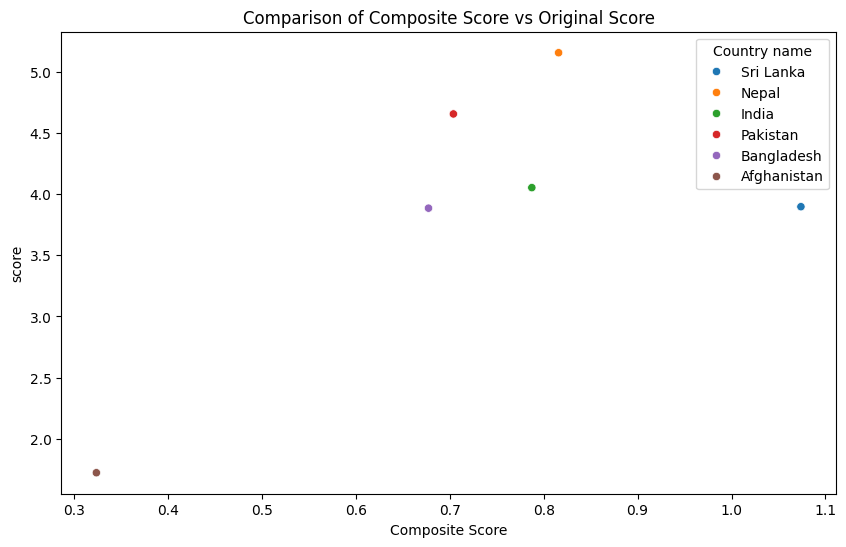

In [68]:
# Calculate Composite Score
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +  # column name Changed
    0.30 * south_asia_df['Healthy life expectancy']
)

# Rank countries based on Composite Score in descending order
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Display the rankings
print("South Asian countries ranked by Composite Score:")
print(south_asia_df[['Country name', 'Composite Score']])

# Horizontal bar chart for top 5 countries by Composite Score
top_5_composite = south_asia_df.nlargest(5, 'Composite Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='muted')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country name')
plt.show()

# Compare Composite Score rankings with original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_df, hue='Country name', palette='tab10')
plt.title('Comparison of Composite Score vs Original Score')
plt.xlabel('Composite Score')
plt.ylabel('score')
plt.show()

**Task 3: Outlier Detection**

Outlier countries based on GDP per Capita and Score:
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


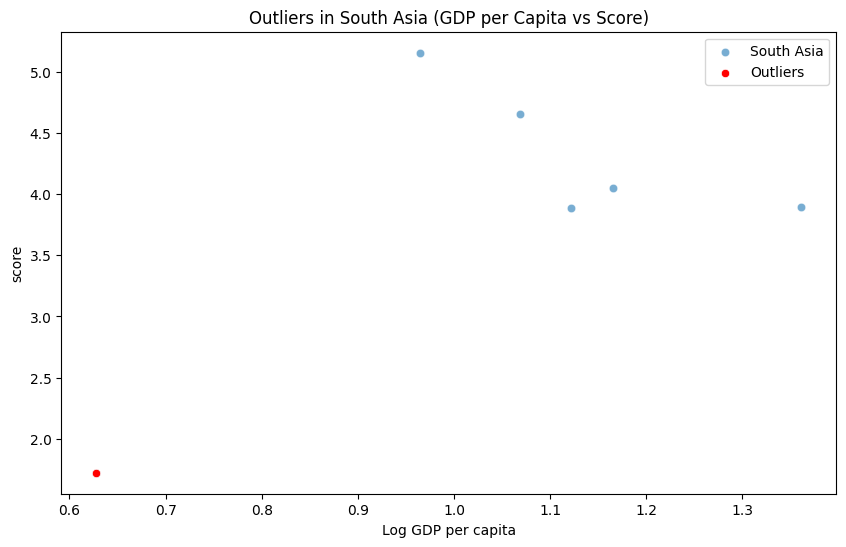

In [69]:
# Calculate IQR for GDP per Capita and Score
q1_gdp, q3_gdp = south_asia_df['Log GDP per capita'].quantile([0.25, 0.75])
iqr_gdp = q3_gdp - q1_gdp

q1_score, q3_score = south_asia_df['score'].quantile([0.25, 0.75])
iqr_score = q3_score - q1_score

# Define outlier thresholds
low_gdp, high_gdp = q1_gdp - 1.5 * iqr_gdp, q3_gdp + 1.5 * iqr_gdp
low_score, high_score = q1_score - 1.5 * iqr_score, q3_score + 1.5 * iqr_score

# Identify outliers
outliers = south_asia_df[
    (south_asia_df['Log GDP per capita'] < low_gdp) |
    (south_asia_df['Log GDP per capita'] > high_gdp) |
    (south_asia_df['score'] < low_score) |
    (south_asia_df['score'] > high_score)
]

print("Outlier countries based on GDP per Capita and Score:")
print(outliers[['Country name', 'Log GDP per capita', 'score']])

# Scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, label='South Asia', alpha=0.6)
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Outliers in South Asia (GDP per Capita vs Score)')
plt.xlabel('Log GDP per capita')
plt.ylabel('score')
plt.legend()
plt.show()


**Task 4: Exploring Trends Across Metrics**

Correlation between Freedom to make life choices and score: 0.8005185224163315
Correlation between Generosity and score: 0.874512371253192


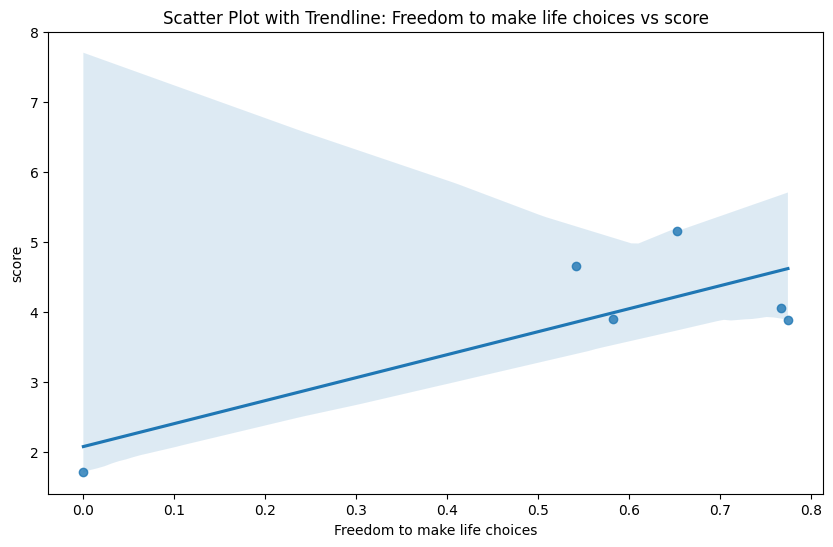

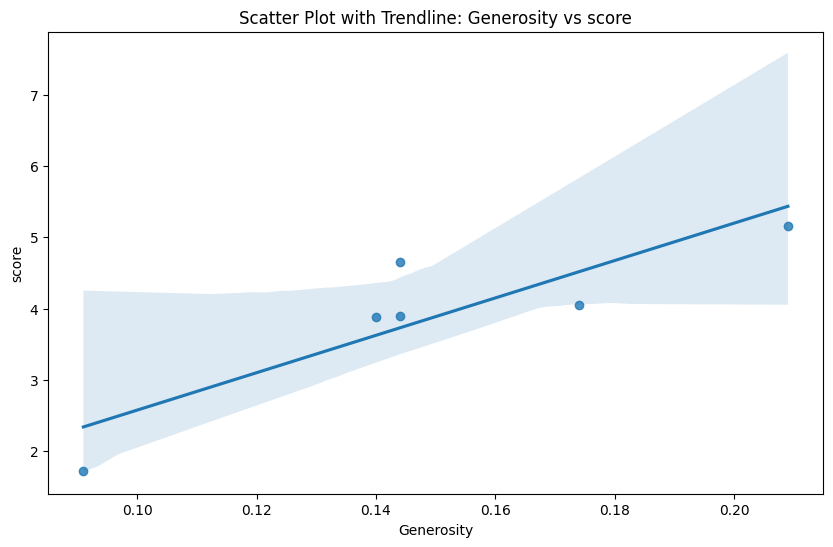

In [70]:
# Calculate Pearson correlation between specific metrics and Score
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    correlation = south_asia_df[metric].corr(south_asia_df['score'])
    print(f"Correlation between {metric} and score: {correlation}")

# Scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=metric, y='score', data=south_asia_df)
    plt.title(f'Scatter Plot with Trendline: {metric} vs score')
    plt.xlabel(metric)
    plt.ylabel('score')
    plt.show()

**Task 5: Gap Analysis**

Top 3 countries with the largest positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 countries with the largest negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


<ipython-input-71-7fd7d49d21e0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([descending_gap.head(3), ascending_gap.head(3)]), palette='coolwarm')


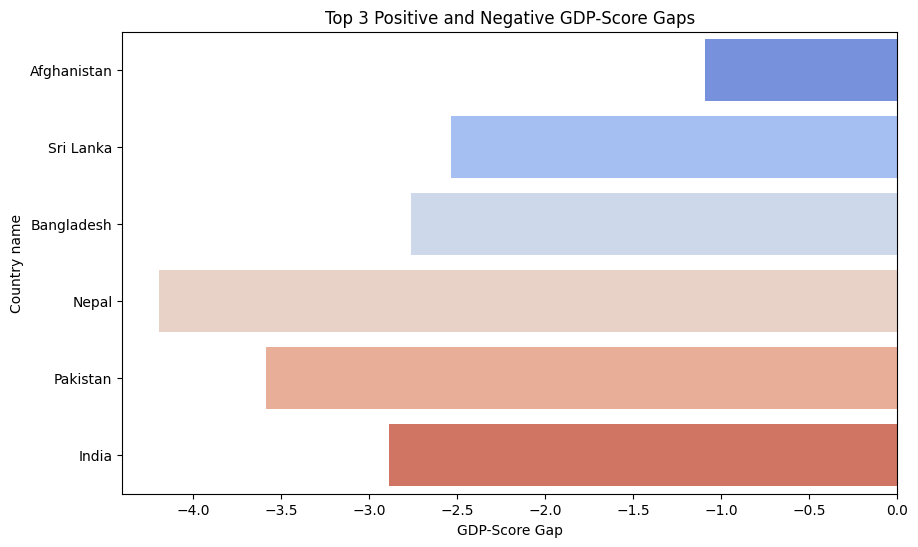

In [71]:
# Add new column for GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Rank countries by GDP-Score Gap in ascending and descending order
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("Top 3 countries with the largest positive GDP-Score Gap:")
print(descending_gap[['Country name', 'GDP-Score Gap']].head(3))

print("\nTop 3 countries with the largest negative GDP-Score Gap:")
print(ascending_gap[['Country name', 'GDP-Score Gap']].head(3))

# Bar chart for top 3 positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([descending_gap.head(3), ascending_gap.head(3)]), palette='coolwarm')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.show()


**Problem - 3 - Comparative Analysis:**

**Task 1: Setup Task - Preparing the Middle Eastern Dataset**

In [72]:
# Define Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# Filter dataset for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Save filtered Middle Eastern dataset to a new CSV file
middle_east_df.to_csv('MiddleEast.csv', index=False)
print("Filtered Middle East dataset saved as 'MiddleEast.csv'")


Filtered Middle East dataset saved as 'MiddleEast.csv'


**Task 2: Descriptive Statistics**

In [73]:
# Calculate mean and standard deviation for South Asia and Middle East
south_asia_stats = {
    "Mean Score": south_asia_df['score'].mean(),
    "Standard Deviation": south_asia_df['score'].std()
}

middle_east_stats = {
    "Mean Score": middle_east_df['score'].mean(),
    "Standard Deviation": middle_east_df['score'].std()
}

print("South Asia Statistics:", south_asia_stats)
print("Middle East Statistics:", middle_east_stats)

# Determine which region has higher average happiness score
if south_asia_stats["Mean Score"] > middle_east_stats["Mean Score"]:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")


South Asia Statistics: {'Mean Score': 3.895666666666667, 'Standard Deviation': 1.1770690152521501}
Middle East Statistics: {'Mean Score': 5.412100000000001, 'Standard Deviation': 1.5662011684327144}
Middle East has a higher average happiness score.


**Task 3: Top and Bottom Performers**

<ipython-input-74-ad4a65afae23>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, bottom_3_sa]), palette='viridis')
<ipython-input-74-ad4a65afae23>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_me, bottom_3_me]), palette='coolwarm')


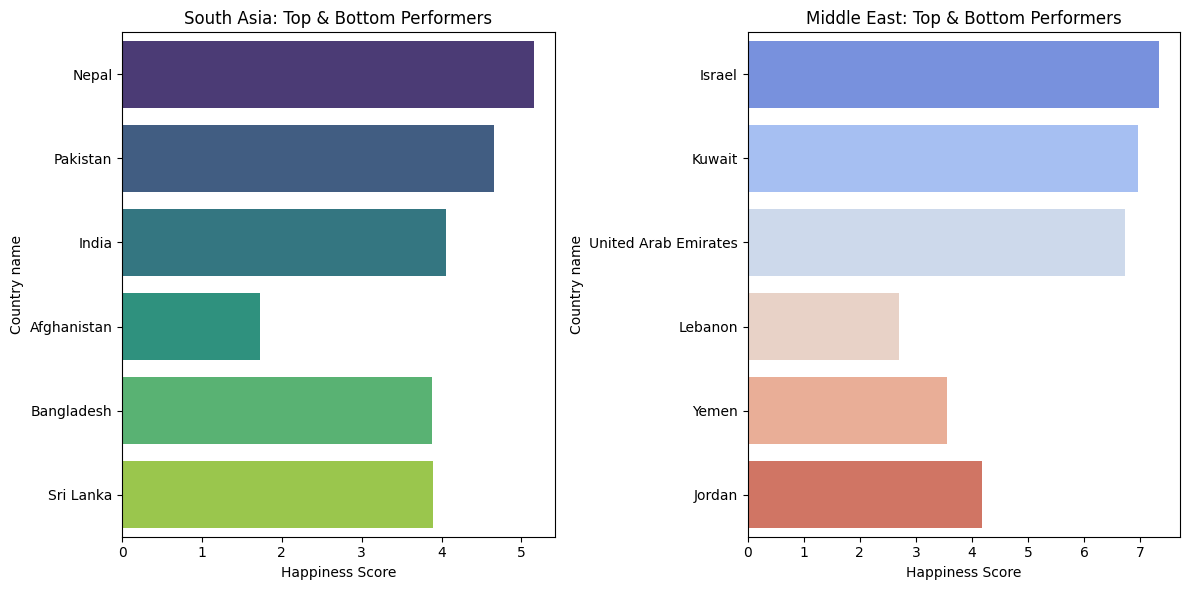

In [74]:
# Identify top and bottom performers in each region
top_3_sa = south_asia_df.nlargest(3, 'score')
bottom_3_sa = south_asia_df.nsmallest(3, 'score')

top_3_me = middle_east_df.nlargest(3, 'score')
bottom_3_me = middle_east_df.nsmallest(3, 'score')

# Plot bar charts for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, bottom_3_sa]), palette='viridis')
plt.title('South Asia: Top & Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country name')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_me, bottom_3_me]), palette='coolwarm')
plt.title('Middle East: Top & Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country name')

plt.tight_layout()
plt.show()


**Task 4: Metric Comparisons**

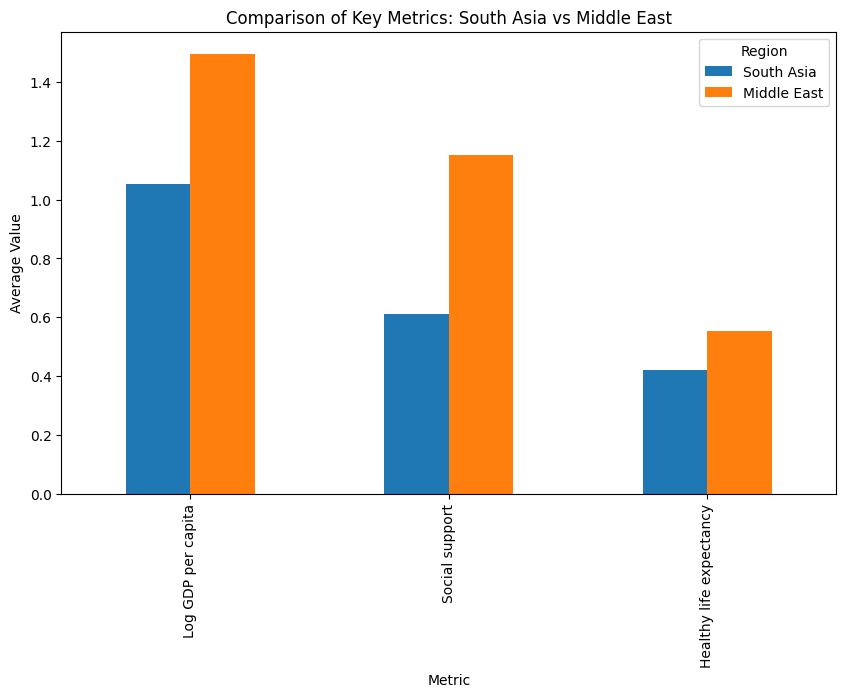

Metric with the largest disparity: Social support


In [75]:
# Compare key metrics between regions
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']  # Corrected column names
region_data = pd.DataFrame({
    'Metric': metrics,
    'South Asia': [south_asia_df[metric].mean() for metric in metrics],
    'Middle East': [middle_east_df[metric].mean() for metric in metrics]
})

region_data.set_index('Metric', inplace=True)

# Grouped bar chart
region_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Key Metrics: South Asia vs Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metric')
plt.legend(title='Region')
plt.show()

# Identify metric with largest disparity
disparity = abs(region_data['South Asia'] - region_data['Middle East'])
largest_disparity_metric = disparity.idxmax()
print(f"Metric with the largest disparity: {largest_disparity_metric}")

**Task 5: Happiness Disparity**

In [76]:
# Compute range and coefficient of variation (CV)
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()

sa_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
me_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia - Range: {sa_range}, Coefficient of Variation: {sa_cv}")
print(f"Middle East - Range: {me_range}, Coefficient of Variation: {me_cv}")

# Which region has greater variability?
if sa_cv > me_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")


South Asia - Range: 3.4370000000000003, Coefficient of Variation: 0.30214828833374263
Middle East - Range: 4.634, Coefficient of Variation: 0.28938880812119405
South Asia has greater variability in happiness.


**Task 6: Correlation Analysis**

South Asia Correlations:
Freedom to make life choices: 0.8005185224163315
Generosity: 0.874512371253192

Middle East Correlations:
Freedom to make life choices: 0.8632202433827543
Generosity: 0.6275236536964182


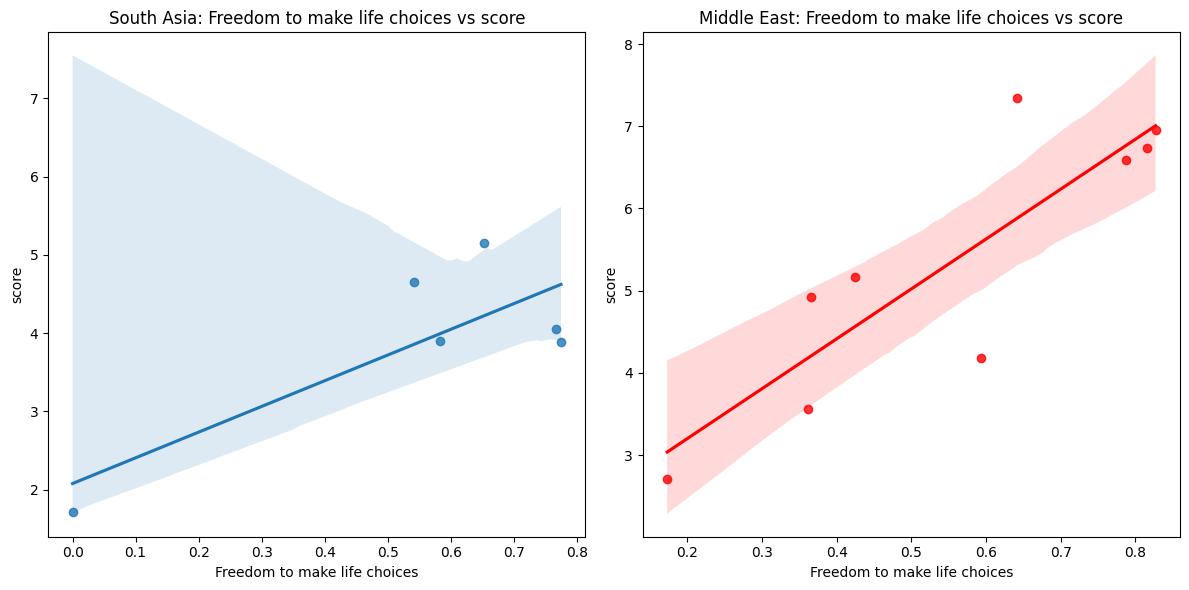

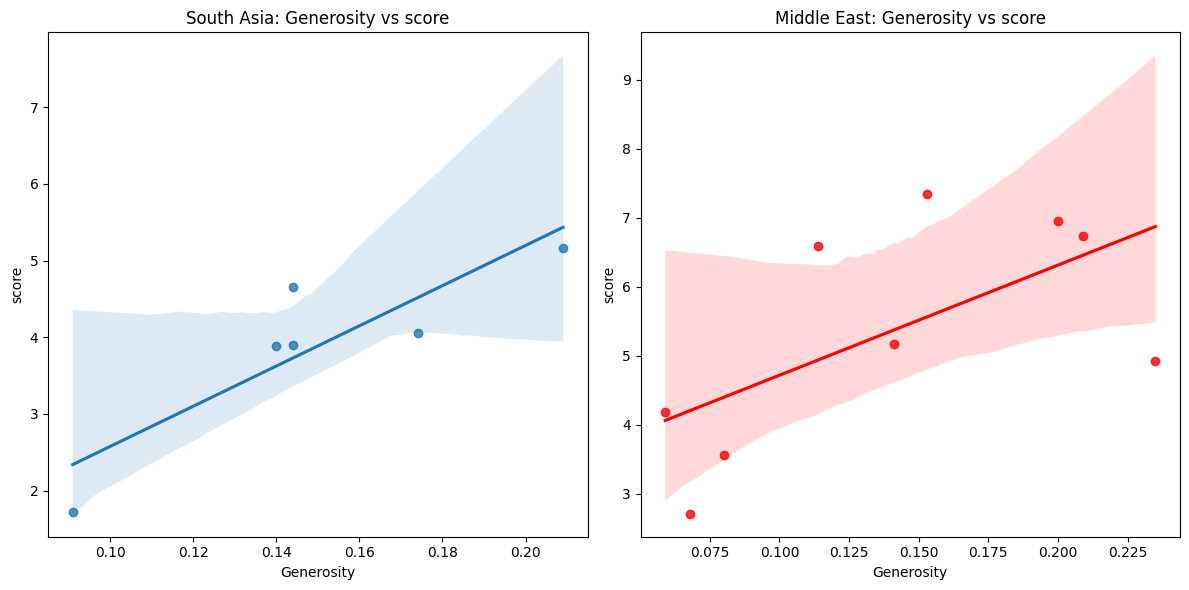

In [77]:
# Analyze correlation of Score with Freedom and Generosity in each region
metrics = ['Freedom to make life choices', 'Generosity']

print("South Asia Correlations:")
for metric in metrics:
    correlation = south_asia_df[metric].corr(south_asia_df['score'])
    print(f"{metric}: {correlation}")

print("\nMiddle East Correlations:")
for metric in metrics:
    correlation = middle_east_df[metric].corr(middle_east_df['score'])
    print(f"{metric}: {correlation}")

# Scatter plots
for metric in metrics:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.regplot(x=metric, y='score', data=south_asia_df, label='South Asia')
    plt.title(f'South Asia: {metric} vs score')
    plt.xlabel(metric)
    plt.ylabel('score')

    plt.subplot(1, 2, 2)
    sns.regplot(x=metric, y='score', data=middle_east_df, label='Middle East', color='red')
    plt.title(f'Middle East: {metric} vs score')
    plt.xlabel(metric)
    plt.ylabel('score')

    plt.tight_layout()
    plt.show()

**Task 7: Outlier Detection and Visualization**

Outliers in South Asia:
    Country name  score
142  Afghanistan  1.721


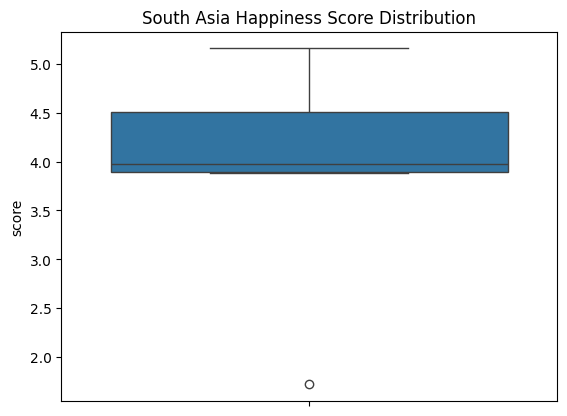

Outliers in Middle East:
Empty DataFrame
Columns: [Country name, score]
Index: []


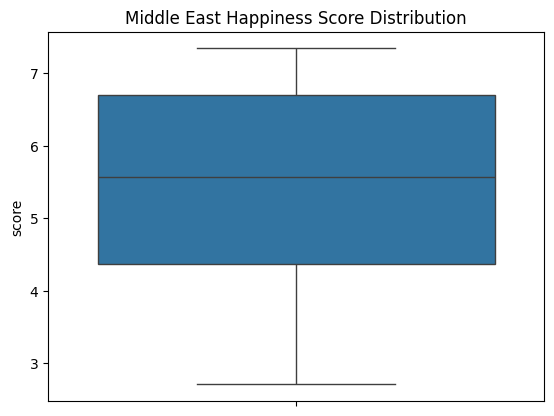

In [78]:
# Detect outliers in both regions
for region_df, region_name in [(south_asia_df, 'South Asia'), (middle_east_df, 'Middle East')]:
    q1 = region_df['score'].quantile(0.25)
    q3 = region_df['score'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = region_df[(region_df['score'] < lower_bound) | (region_df['score'] > upper_bound)]
    print(f"Outliers in {region_name}:")
    print(outliers[['Country name', 'score']])

    # Plot boxplots
    sns.boxplot(data=region_df['score'])
    plt.title(f'{region_name} Happiness Score Distribution')
    plt.show()
